# $$\text{HW} 05$$

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import chi2 as chi2
from matplotlib.pyplot import *
plt.rcParams["figure.figsize"] = (12,8)

font = {'size': 20}

matplotlib.rc('font', **font)

In [2]:
'''
z_data = redshift data
m = apparent magnitude
dm = error in apparent magnitude
c = speed of light in km/s
'''

fileName = 'HW05.txt'
data = np.genfromtxt(fileName)
z_data = data[:,0]
m = data[:,1]
dm = data[:,2]
c = 3E5

---

## $$Q1.a)$$

In [3]:
'''
z = a single redshift value
H0 = Hubble constant
omega_M = energy density of matter
omega_L = energy density of dark energy

The function calculates the distance modulus for one redshift value in z_data list which is used to 
find the apparent magnitude
'''

def d_L(z, H0, omega_M, omega_L):
    z_list = np.linspace(0, z, 53)
    term_1 = (1+z) * (c/H0)
    integrand = 1/(np.sqrt(omega_M * (1+z_list)**3 + omega_L))
 
    term_ret = term_1 * np.trapz(integrand, z_list) * (10**6)
    return term_ret 

In [4]:
'''
M - Absolute magnitude

The function loops through the z_data and calculates apparent magnitude for each and creates and returns a 
list of apparent magnitude.
'''

def app_mag(H0, omega_M, omega_L, M):
    app_mag_list = []
    z_data = data[:,0]

    for z in z_data:
        dL = d_L(z, H0, omega_M, omega_L) 
        m_calculated = M + 5*(np.log10(dL) - 1)
        app_mag_list.append(m_calculated)
    return app_mag_list

In [5]:
#calculates chisq 

def chisq(parameter):
    omega_M, omega_L, H0, M = parameter
    m = data[:,1]
    D_i = m
    F_i = app_mag(H0, omega_M, omega_L, M)
    return np.sum(((F_i) - (D_i))**2 / dm**2)

In [6]:
#minimizes

init_guess = [1,0,70, -19]
bestfit_a = minimize(chisq, init_guess, method = 'SLSQP', bounds = [[-3,3],[-1,4], [50,100], [-20, -18]])

<ipython-input-3-a46ce9127116>:14: RuntimeWarning: invalid value encountered in sqrt
  integrand = 1/(np.sqrt(omega_M * (1+z_list)**3 + omega_L))


In [7]:
bestfit_a

     fun: 120.73782700470308
     jac: array([-8.20159912e-04, -9.38415527e-04, -1.04904175e-05,  1.05857849e-03])
 message: 'Optimization terminated successfully'
    nfev: 56
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([  0.32052522,   0.90586471,  72.59101873, -18.87416579])

In [8]:
calc_m = app_mag(bestfit_a.x[2], bestfit_a.x[0], bestfit_a.x[1], bestfit_a.x[3])

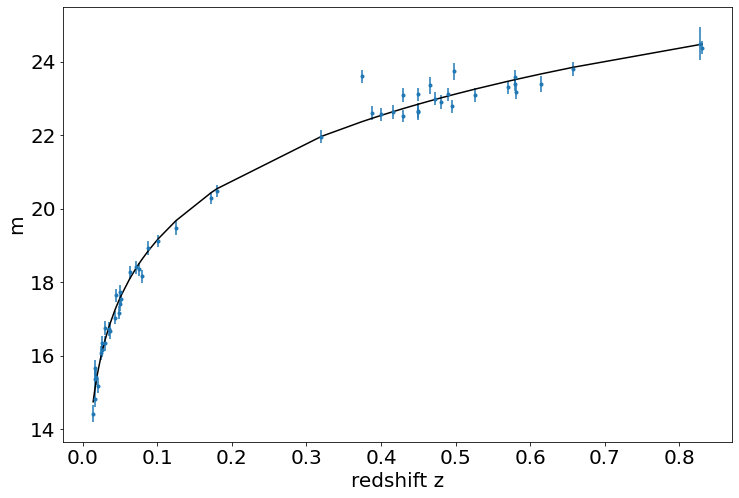

In [9]:
plt.plot(z_data, calc_m, color = 'black')
plt.errorbar(z_data, m, yerr = dm, xerr = 0, fmt = '.')
plt.xlabel('redshift z')
plt.ylabel('m')
plt.show()

## Best-fit values:
$$\chi^{2} =  120.7$$\
$$\Omega_{M} = 0.3205$$\
$$\Omega_{\Lambda} = 0.9059$$\
$$H_{0} = 72.59 \text{ }kms^{-1} Mpc^{-1}$$\
$$M = -18.87 $$

---

## $$Q1.b)$$

In [10]:
def d_L_b(z, H0, omega_M):
    omega_L = 1 - omega_M
    z_list = np.linspace(0, z, 53)
    term_1 = (1+z) * (c/H0)
    integrand = 1/(np.sqrt(omega_M * (1+z_list)**3 + omega_L))
 
    term_ret = term_1 * np.trapz(integrand, z_list) * (10**6)
    return term_ret 

In [11]:
def app_mag_b(H0, omega_M, M):
    omega_L = 1 - omega_M
    app_mag_list = []
    z_data = data[:,0]

    for z in z_data:
        dL = d_L_b(z, H0, omega_M)
        x = M + 5*(np.log10(dL) - 1)
        app_mag_list.append(x)
    return app_mag_list

In [12]:
def chisq(parameter):
    omega_M, H0, M = parameter
    omega_L = 1 - omega_M
    m = data[:,1]
    D_i = m
    F_i = app_mag_b(H0, omega_M, M)
    return np.sum(((F_i) - (D_i))**2 / dm**2)

In [13]:
init_guess = [1,70, -19]
bestfit_b = minimize(chisq, init_guess, method = 'SLSQP', bounds = [[-3,3], [50,100], [-20, -18]])

<ipython-input-10-8a95ec786b97>:5: RuntimeWarning: invalid value encountered in sqrt
  integrand = 1/(np.sqrt(omega_M * (1+z_list)**3 + omega_L))


In [14]:
bestfit_b

     fun: 120.73782722069738
     jac: array([-0.01579094, -0.00021267,  0.00728321])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([  0.26132261,  76.95056347, -18.96910478])

In [15]:
bestfit_b.fun - bestfit_a.fun

2.1599430510832462e-07

### For part(b) with one less parameter we get $\chi^{2} = 120.73$ making our $\Delta\chi^{2} = 2.16 \cdot 10^{-7}$. Therefore, not a significant difference in the value compared to (a). From this small difference we can justify that our fitting is not affected significantly by fixing our variable $\Omega_{\Lambda}$.

---

## $$Q1.c)$$

In [16]:
def d_L_c(z, H0):
    omega_M = 1
    omega_L = 1 - omega_M
    z_list = np.linspace(0, z, 53)
    term_1 = (1+z) * (c/H0)
    integrand = 1/(np.sqrt(omega_M * (1+z_list)**3 + omega_L))
 
    term_ret = term_1 * np.trapz(integrand, z_list) * (10**6)
    return term_ret 

In [17]:
def app_mag_c(H0, M):
    omega_M = 1
    omega_L = 1 - omega_M
    app_mag_list = []
    z_data = data[:,0]

    for z in z_data:
        dL = d_L_c(z, H0)
        x = M + 5*(np.log10(dL) - 1)
        app_mag_list.append(x)
    return app_mag_list

In [18]:
def chisq(parameter):
    omega_M = 1
    H0, M = parameter
    omega_L = 1 - omega_M
    m = data[:,1]
    D_i = m
    F_i = app_mag_c(H0, M)
    return np.sum(((F_i) - (D_i))**2 / dm**2)

In [19]:
init_guess = [70, -19]
bestfit_c = minimize(chisq, init_guess, method = 'SLSQP', bounds = [[50,100], [-20, -18]])

In [20]:
bestfit_c

     fun: 172.35270613653384
     jac: array([ 0.00140953, -0.0448246 ])
 message: 'Optimization terminated successfully'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 69.71679683, -18.94819118])

In [21]:
calc_m_c = app_mag_c(bestfit_c.x[0], bestfit_c.x[1])

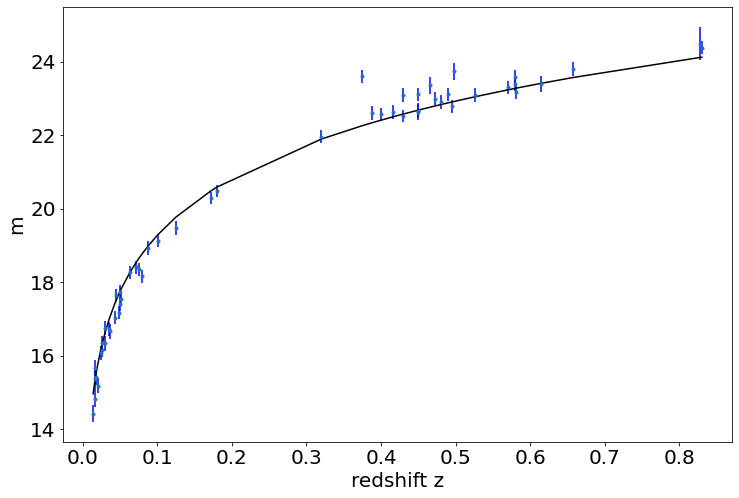

<Figure size 2880x720 with 0 Axes>

In [22]:
plt.plot(z_data, calc_m_c, color = 'black')
plt.errorbar(z_data, m, yerr = dm, xerr = 0, fmt = '.', ecolor = 'blue')
plt.xlabel('redshift z')
plt.ylabel('m')
plt.figure(figsize=(40,10))
plt.show()

## Best-fit values:
$$H_{0} = 69.72 \text{ }kms^{-1} Mpc^{-1}$$\
$$M = -18.95 $$

---

## $$Q1.d)$$

In [23]:
chisq_nested = bestfit_c.fun
chisq_unnested = bestfit_b.fun

delChisq = chisq_nested - chisq_unnested

In [24]:
pValue = 1 - chi2.cdf(delChisq, 1)
pValue

6.752376435770202e-13

In [25]:
st.norm.isf(pValue)

7.089037913442505

### Our difference in $\chi^{2}$, $\Delta\chi^{2} = 51.61$. Using the difference and Wilks' theorem we calculated our z-score to be ~7. This suggests that the addition of the term, $\Omega_{\Lambda}$ is crucial for our fit since $7 \sigma$ > $5 \sigma$.